In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\vaibh\Downloads\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Correct 0 values in SkinThickness

df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
# Correct 0 values in Insulin and Glucose
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
# Correct 0 values in BloodPressure
df['BloodPressure'] =df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['BMI'] =df['BMI'].replace(0,df['BMI'].median())

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, ' Corelation Of Columns')

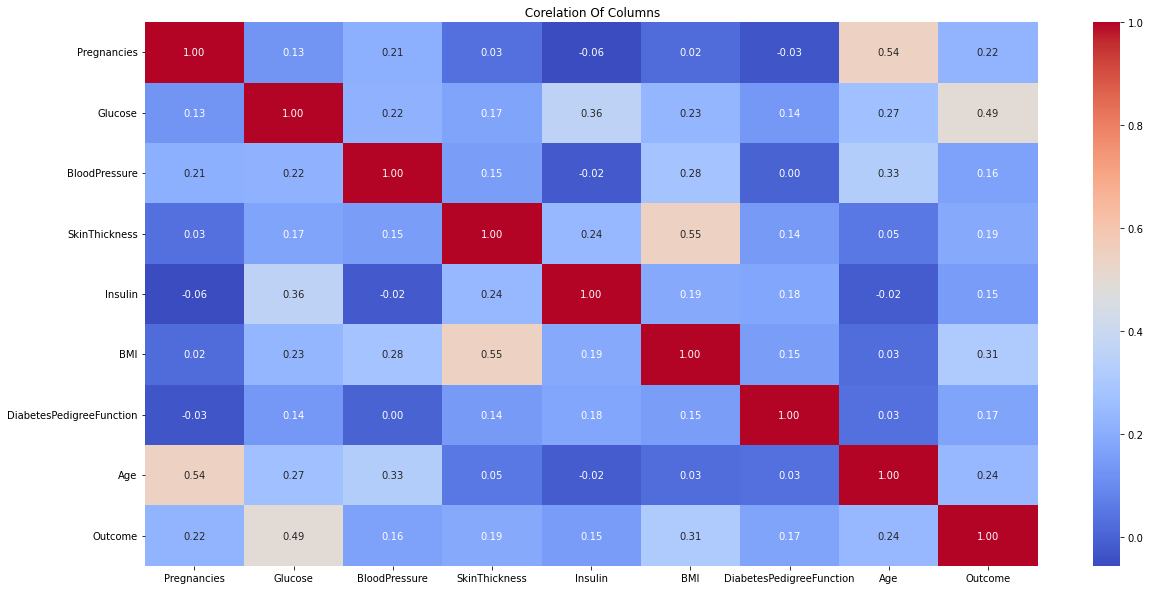

In [8]:
plt.figure(figsize=(20,10))
corr_columns = df.corr()
sns.heatmap(corr_columns,annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title(' Corelation Of Columns')

Text(0, 0.5, 'Count')

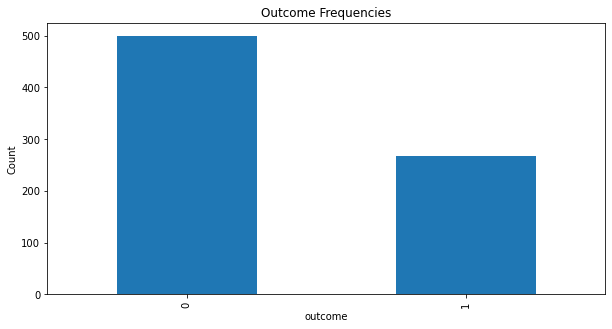

In [9]:
# Outcome column
plt.figure(figsize=(10,5))
df['Outcome'].value_counts().plot(kind = 'bar')
plt.title('Outcome Frequencies')
plt.xlabel('outcome')
plt.ylabel('Count')

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

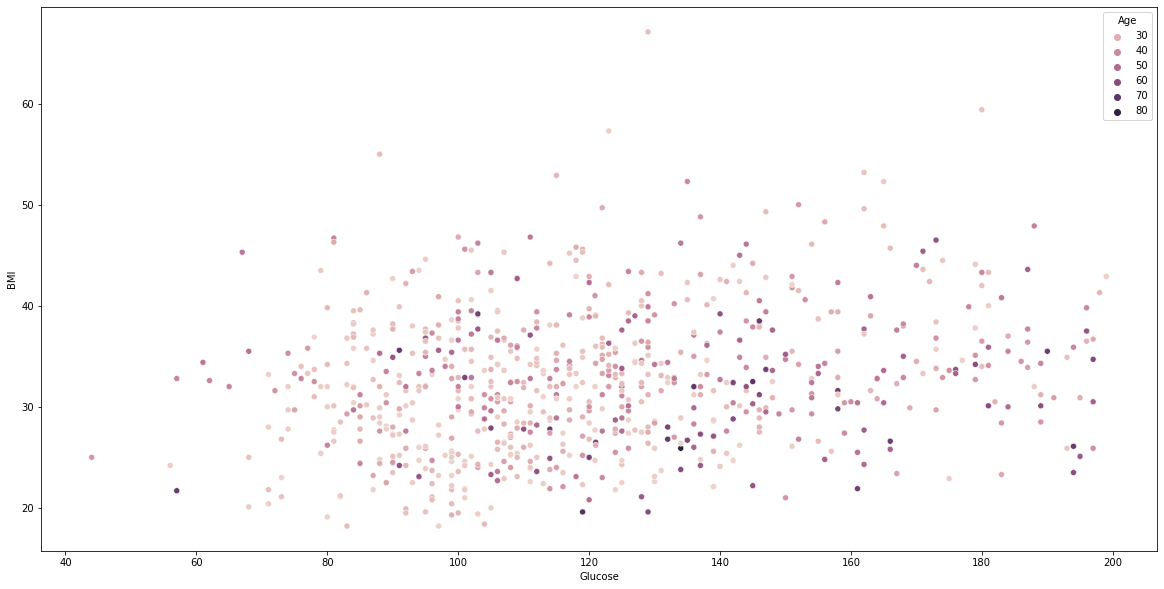

In [10]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Glucose", y="BMI",hue="Age")

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

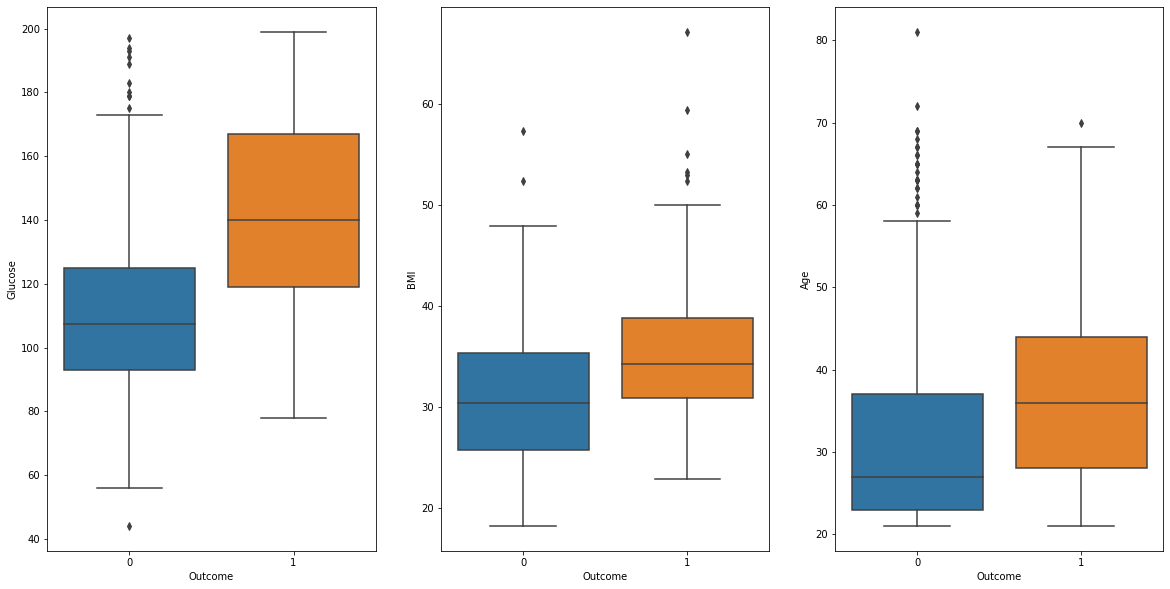

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(data=df,x="Outcome",y="Glucose")
plt.subplot(1,3,2)
sns.boxplot(data=df,x="Outcome",y="BMI")
plt.subplot(1,3,3)
sns.boxplot(data=df,x="Outcome",y="Age")

In [12]:
def detect_outliers(data,cols):
    for x in cols:
        q75,q25 = np.percentile(data.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        data.loc[data[x] < min,x] = np.nan
        data.loc[data[x] > max,x] = np.nan

In [13]:
outliers_drop = detect_outliers(df, ["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 
                                                      'DiabetesPedigreeFunction', 'SkinThickness', 
                                                      'Insulin', 'Age'])

In [14]:
df = df.dropna(axis = 0)

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
X = df.drop(["Outcome"], axis=1)
print(X)
y = df["Outcome"]
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0     30.5  33.6   
1            1.0     85.0           66.0           29.0     30.5  26.6   
2            8.0    183.0           64.0           23.0     30.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
5            5.0    116.0           74.0           23.0     30.5  25.6   
..           ...      ...            ...            ...      ...   ...   
762          9.0     89.0           62.0           23.0     30.5  22.5   
764          2.0    122.0           70.0           27.0     30.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           23.0     30.5  30.1   
767          1.0     93.0           70.0           31.0     30.5  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
y_pred = knn.predict(X_test)

In [25]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.734375


In [29]:
knn.score(X_test,y_test)

0.734375

In [30]:
knn.score(X_train,y_train)

0.8346456692913385